In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
data = pd.read_csv('breast-cancer-wisconsin.data', names=['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
# Convert ? to NaN
data['Bare Nuclei']  = pd.to_numeric(data['Bare Nuclei'], errors='coerce', downcast='integer')
data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean(), inplace=True)

In [28]:
data.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
corr = data.corr()
#plt.subplots(figsize=(30, 30))
#cmap = sns.diverging_palette(150, 250, as_cmap=True)
#sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [30]:
# Drop id column
data = data.drop(['id','Mitoses'], axis=1)

In [31]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accurracy: {:.4%}'.format(acc))
confusion_matrix(y_test, y_pred)
print('Recall: {:.4%}'.format(recall_score(y_test, y_pred, average='micro')))

Accurracy: 93.8095%
Recall: 93.8095%


In [33]:
decTree = DecisionTreeClassifier()
my_pipeline = Pipeline(steps=[('model',decTree)])

scores = cross_val_score(my_pipeline, X, y, scoring='recall_micro', cv=5)

print("MAE scores:\n", scores)
print("Avg score:\n", sum(scores)/5)

MAE scores:
 [0.89361702 0.95       0.95714286 0.96402878 0.94244604]
Avg score:
 0.9414469397126677


In [34]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accurracy : {:.4%}'.format(acc))

Accurracy : 97.1429%
Accurracy : 96.1905%
Accurracy : 92.8571%
Accurracy : 93.8095%
Accurracy : 97.6190%
Accurracy : 96.6667%
Accurracy : 94.2857%
Accurracy : 97.1429%
Accurracy : 96.6667%
Accurracy : 94.7619%


C:\Users\manis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


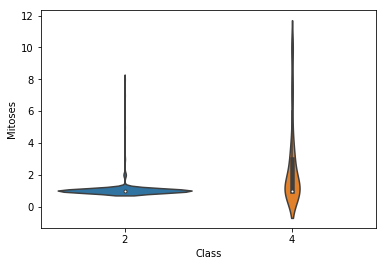

In [25]:
# Visualize Clump Thickness column
#sns.violinplot(x="Class", y="Clump Thickness", data=data)
#sns.catplot(kind="count", x="Clump Thickness", hue="Class", data=data)
# Visualize Clump Thickness column
#sns.violinplot(x="Class", y="Uniformity of Cell Size", data=data)
#sns.violinplot(x="Class", y="Uniformity of Cell Shape", data=data)
sns.violinplot(x="Class", y="Mitoses", data=data) 
#Mitoses does not contribute much since it has simila distribution for both the classes. Dropping it made accurracy better.